<a href="https://colab.research.google.com/github/sudheer24/udl_notebooks/blob/main/Notebooks/Chap05/5_3_Multiclass_Cross_entropy_Loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 5.3 Multiclass Cross-Entropy Loss**

This notebook investigates the multi-class cross-entropy loss.  It follows from applying the formula in section 5.2 to a loss function based on the Categorical distribution.

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [1]:
# Imports math library
import numpy as np
# Used for repmat
import numpy.matlib
# Imports plotting library
import matplotlib.pyplot as plt
# Import math Library
import math

In [2]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

# Define a shallow neural network
def shallow_nn(x, beta_0, omega_0, beta_1, omega_1):
    # Make sure that input data is (1 x n_data) array
    n_data = x.size
    x = np.reshape(x,(1,n_data))

    # This runs the network for ALL of the inputs, x at once so we can draw graph
    h1 = ReLU(np.matmul(beta_0,np.ones((1,n_data))) + np.matmul(omega_0,x))
    model_out = np.matmul(beta_1,np.ones((1,n_data))) + np.matmul(omega_1,h1)
    return model_out

In [3]:
# Get parameters for model -- we can call this function to easily reset them
def get_parameters():
  # And we'll create a network that approximately fits it
  beta_0 = np.zeros((3,1));  # formerly theta_x0
  omega_0 = np.zeros((3,1)); # formerly theta_x1
  beta_1 = np.zeros((3,1));  # NOTE -- there are three outputs now (one for each class, so three output biases)
  omega_1 = np.zeros((3,3)); # NOTE -- there are three outputs now (one for each class, so nine output weights, connecting 3 hidden units to 3 outputs)

  beta_0[0,0] = 0.3; beta_0[1,0] = -1.0; beta_0[2,0] = -0.5
  omega_0[0,0] = -1.0; omega_0[1,0] = 1.8; omega_0[2,0] = 0.65
  beta_1[0,0] = 2.0; beta_1[1,0] = -2; beta_1[2,0] = 0.0
  omega_1[0,0] = -24.0; omega_1[0,1] = -8.0; omega_1[0,2] = 50.0
  omega_1[1,0] = -2.0; omega_1[1,1] = 8.0; omega_1[1,2] = -30.0
  omega_1[2,0] = 16.0; omega_1[2,1] = -8.0; omega_1[2,2] =-8

  return beta_0, omega_0, beta_1, omega_1

In [5]:
# Utility function for plotting data
def plot_multiclass_classification(x_model, out_model, lambda_model, x_data = None, y_data = None, title= None):
  # Make sure model data are 1D arrays
  n_data = len(x_model)
  n_class = 3
  x_model = np.squeeze(x_model)
  out_model = np.reshape(out_model, (n_class,n_data))
  lambda_model = np.reshape(lambda_model, (n_class,n_data))

  fig, ax = plt.subplots(1,2)
  fig.set_size_inches(7.0, 3.5)
  fig.tight_layout(pad=3.0)
  ax[0].plot(x_model,out_model[0,:],'r-')
  ax[0].plot(x_model,out_model[1,:],'g-')
  ax[0].plot(x_model,out_model[2,:],'b-')
  ax[0].set_xlabel('Input, $x$'); ax[0].set_ylabel('Model outputs')
  ax[0].set_xlim([0,1]);ax[0].set_ylim([-4,4])
  if title is not None:
    ax[0].set_title(title)
  ax[1].plot(x_model,lambda_model[0,:],'r-')
  ax[1].plot(x_model,lambda_model[1,:],'g-')
  ax[1].plot(x_model,lambda_model[2,:],'b-')
  ax[1].set_xlabel('Input, $x$'); ax[1].set_ylabel('$\lambda$ or Pr(y=k|x)')
  ax[1].set_xlim([0,1]);ax[1].set_ylim([-0.1,1.05])
  if title is not None:
    ax[1].set_title(title)
  if x_data is not None:
    for i in range(len(x_data)):
      if y_data[i] ==0:
        ax[1].plot(x_data[i],-0.05, 'r.')
      if y_data[i] ==1:
        ax[1].plot(x_data[i],-0.05, 'g.')
      if y_data[i] ==2:
        ax[1].plot(x_data[i],-0.05, 'b.')
  plt.show()

<>:23: SyntaxWarning: invalid escape sequence '\l'
<>:23: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-642789806.py:23: SyntaxWarning: invalid escape sequence '\l'
  ax[1].set_xlabel('Input, $x$'); ax[1].set_ylabel('$\lambda$ or Pr(y=k|x)')


# Multiclass classification

For multiclass classification, the network must predict the probability of $K$ classes, using $K$ outputs.  However, these probability must be non-negative and sum to one, and the network outputs can take arbitrary values.  Hence, we pass the outputs through a softmax function which maps $K$ arbitrary values to $K$ non-negative values that sum to one.

In [14]:
# Softmax function that maps a vector of arbitrary values to a vector of values that are positive and sum to one.
def softmax(model_out):
  # This operation has to be done separately for every column of the input
  # Compute exponentials of all the elements
  # TODO: compute the softmax function (eq 5.22)
  # Replace this skeleton code

  # Compute the exponential of the model outputs
  exp_model_out = np.exp(model_out)
  # Compute the sum of the exponentials (denominator of equation 5.22)
  sum_exp_model_out = np.sum(exp_model_out,axis=0, keepdims=True)
  # Normalize the exponentials (np.matlib.repmat might be useful here)
  softmax_model_out = exp_model_out / np.matlib.repmat(sum_exp_model_out, exp_model_out.shape[0], 1)

  return softmax_model_out

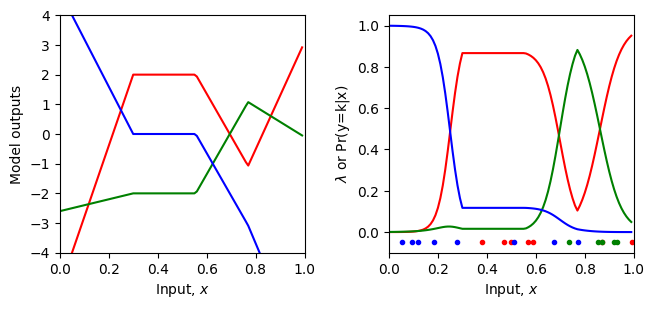

In [15]:

# Let's create some 1D training data
x_train = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                   0.87168699,0.58858043])
y_train = np.array([2,0,1,2,1,0,\
                    0,2,2,0,2,0,\
                    2,0,1,2,1,2, \
                    1,0])

# Get parameters for the model
beta_0, omega_0, beta_1, omega_1 = get_parameters()

# Define a range of input values
x_model = np.arange(0,1,0.01)
# Run the model to get values to plot and plot it.
model_out= shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
lambda_model = softmax(model_out)
plot_multiclass_classification(x_model, model_out, lambda_model, x_train, y_train)


The left is model output and the right is the model output after the softmax has been applied, so it now lies in the range [0,1] and represents the probability, that y=0 (red), 1 (green) and 2 (blue).  The dots at the bottom show the training data with the same color scheme.  So we want the red curve to be high where there are red dots, the green curve to be high where there are green dots, and the blue curve to be high where there are blue dots  We'll compute the likelihood and the negative log likelihood.

In [ ]:
# Return probability under categorical distribution for observed class y
# Just take value from row k of lambda param where y =k,
def categorical_distribution(y, lambda_param):
    return np.array([lambda_param[row, i] for i, row in enumerate (y)])

In [ ]:
# Here are three examples
print(categorical_distribution(np.array([[0]]),np.array([[0.2],[0.5],[0.3]])))
print(categorical_distribution(np.array([[1]]),np.array([[0.2],[0.5],[0.3]])))
print(categorical_distribution(np.array([[2]]),np.array([[0.2],[0.5],[0.3]])))

Now let's compute the likelihood using this function

In [ ]:
# Return the likelihood of all of the data under the model
def compute_likelihood(y_train, lambda_param):
  # TODO -- compute the likelihood of the data -- the product of the categorical probabilities for each data point
  # Top line of equation 5.3 in the notes
  # You will need np.prod() and the categorical_distribution function you used above
  # Replace the line below
  likelihood = 0

  return likelihood

In [ ]:
# Let's test this
beta_0, omega_0, beta_1, omega_1 = get_parameters()
# Use our neural network to predict the parameters of the categorical distribution
model_out = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
lambda_train = softmax(model_out)
# Compute the likelihood
likelihood = compute_likelihood(y_train, lambda_train)
# Let's double check we get the right answer before proceeding
print("Correct answer = %9.9f, Your answer = %9.9f"%(0.000000041,likelihood))

You can see that this gives a very small answer, even for this small 1D dataset, and with the model fitting quite well.  This is because it is the product of several probabilities, which are all quite small themselves.
This will get out of hand pretty quickly with real datasets -- the likelihood will get so small that we can't represent it with normal finite-precision math

This is why we use negative log likelihood

In [ ]:
# Return the negative log likelihood of the data under the model
def compute_negative_log_likelihood(y_train, lambda_param):
  # TODO -- compute the negative log likelihood of the data -- don't use the likelihood function above -- compute the negative sum of the log probabilities
  # You will need np.sum(), np.log()
  # Replace the line below
  nll = 0

  return nll

In [ ]:
# Let's test this
beta_0, omega_0, beta_1, omega_1 = get_parameters()
# Use our neural network to predict the parameters of the categorical distribution
model_out = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
# Pass the outputs through the softmax function
lambda_train = softmax(model_out)
# Compute the negative log likelihood
nll = compute_negative_log_likelihood(y_train, lambda_train)
# Let's double check we get the right answer before proceeding
print("Correct answer = %9.9f, Your answer = %9.9f"%(17.015457867,nll))

Now let's investigate finding the maximum likelihood / minimum negative log likelihood solution.  For simplicity, we'll assume that all the parameters are fixed except one and look at how the likelihood and negative log likelihood change as we manipulate the last parameter.  We'll start with overall y_offset, $\beta_1$ (formerly $\phi_0$)

In [ ]:
# Define a range of values for the parameter
beta_1_vals = np.arange(-2,6.0,0.1)
# Create some arrays to store the likelihoods, negative log likelihoods
likelihoods = np.zeros_like(beta_1_vals)
nlls = np.zeros_like(beta_1_vals)

# Initialise the parameters
beta_0, omega_0, beta_1, omega_1 = get_parameters()
for count in range(len(beta_1_vals)):
  # Set the value for the parameter
  beta_1[0,0] = beta_1_vals[count]
  # Run the network with new parameters
  model_out = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
  lambda_train = softmax(model_out)
  # Compute and store the two values
  likelihoods[count] = compute_likelihood(y_train,lambda_train)
  nlls[count] = compute_negative_log_likelihood(y_train, lambda_train)
  # Draw the model for every 20th parameter setting
  if count % 20 == 0:
    # Run the model to get values to plot and plot it.
    model_out = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
    lambda_model = softmax(model_out)
    plot_multiclass_classification(x_model, model_out, lambda_model, x_train, y_train, title="beta1[0,0]=%3.3f"%(beta_1[0,0]))


In [ ]:
# Now let's plot the likelihood and negative log likelihood as a function of the value of the offset beta1
fig, ax = plt.subplots()
fig.tight_layout(pad=5.0)
likelihood_color = 'tab:red'
nll_color = 'tab:blue'


ax.set_xlabel('beta_1[0, 0]')
ax.set_ylabel('likelihood', color = likelihood_color)
ax.plot(beta_1_vals, likelihoods, color = likelihood_color)
ax.tick_params(axis='y', labelcolor=likelihood_color)

ax1 = ax.twinx()
ax1.plot(beta_1_vals, nlls, color = nll_color)
ax1.set_ylabel('negative log likelihood', color = nll_color)
ax1.tick_params(axis='y', labelcolor = nll_color)

plt.axvline(x = beta_1_vals[np.argmax(likelihoods)], linestyle='dotted')

plt.show()

In [ ]:
# Hopefully, you can see that the maximum of the likelihood fn is at the same position as the minimum negative log likelihood solution
# Let's check that:
print("Maximum likelihood = %f, at beta_1=%3.3f"%( (likelihoods[np.argmax(likelihoods)],beta_1_vals[np.argmax(likelihoods)])))
print("Minimum negative log likelihood = %f, at beta_1=%3.3f"%( (nlls[np.argmin(nlls)],beta_1_vals[np.argmin(nlls)])))

# Plot the best model
beta_1[0,0] = beta_1_vals[np.argmin(nlls)]
model_out = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
lambda_model = softmax(model_out)
plot_multiclass_classification(x_model, model_out, lambda_model, x_train, y_train, title="beta1[0,0]=%3.3f"%(beta_1[0,0]))


They both give the same answer. But you can see from the likelihood above that the likelihood is very small unless the parameters are almost correct.  So in practice, we would work with the negative log likelihood.<br><br>

Again, to fit the full neural model we would vary all of the 16 parameters of the network in the $\boldsymbol\beta_{0},\boldsymbol\Omega_{0},\boldsymbol\beta_{1},\boldsymbol\Omega_{1}$ until we find the combination that have the maximum likelihood / minimum negative log likelihood.<br><br>

